# Figures 5 and 6

In [22]:
from __future__ import division
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

## Global parameters

In [23]:
N = 500 # number of firms
H = N*20 # number of workers
Lambda = .02 # separation rate
sampleSize = 500 # last periods to sample

## Useful functions

In [24]:
def assignH(G, node, h):
    G.node[node]['h'] = h

def uSolNetwork(G):
    N = G.number_of_nodes()
    degs = np.array([G.degree(firm) for firm in range(N)])
    hs = np.array([G.node[node]['h'] for node in range(N)])
    hns = np.array([np.mean(hs[np.array(G.neighbors(i))]) for i in range(N)])
    semiSizes = np.sum(hs*hns*degs/Lambda)
    semiUnemps = np.sum(hs*degs)
    return semiUnemps/(semiUnemps+semiSizes)

def uSolGlobal(G):
    return Lambda/(Lambda + np.mean([G.node[i]['h'] for i in G.nodes()]))

## Figure 5: experiment on regular network

In [25]:
box00 = []
box01 = []
box02 = []
box03 = []
box10 = []
box11 = []
box12 = []
box13 = []
box20 = []
box21 = []
box22 = []
box23 = []

G = nx.random_regular_graph(4, N)

for exp in range(sampleSize):
    
    # bell-shaped distribution of h
    hs = st.beta.rvs(10, 10, size=N)
    hst = [assignH(G, i, hs[i]) for i in G.nodes()]
    box00.append(uSolGlobal(G))
    box01.append(uSolNetwork(G))
    hs = np.sort(hs)
    ego = rd.choice(G.nodes())
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box03.append(uSolNetwork(G))
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v, reverse=True)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box02.append(uSolNetwork(G)) 
    
    # uniform distribution of h
    hs = st.beta.rvs(1, 1, size=N)
    hst = [assignH(G, i, hs[i]) for i in G.nodes()]
    box10.append(uSolGlobal(G))
    box11.append(uSolNetwork(G))
    hs = np.sort(hs)
    ego = rd.choice(G.nodes())
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box13.append(uSolNetwork(G))
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v, reverse=True)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box12.append(uSolNetwork(G)) 
    
    # U-shaped distribution of h
    hs = st.beta.rvs(.5, .5, size=N)
    hst = [assignH(G, i, hs[i]) for i in G.nodes()]
    box20.append(uSolGlobal(G))
    box21.append(uSolNetwork(G))
    hs = np.sort(hs)
    ego = rd.choice(G.nodes())
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box23.append(uSolNetwork(G))
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v, reverse=True)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box22.append(uSolNetwork(G)) 
    

## Plot results

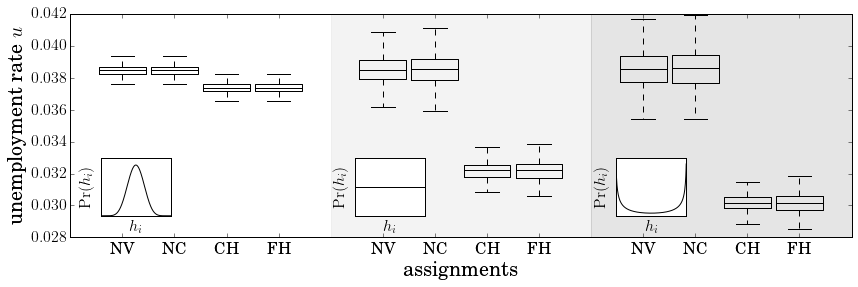

In [26]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, big_axes = plt.subplots(figsize=(14, 4) , nrows=1, ncols=1, sharey=True) 

plt.boxplot([box00, box01, box02, box03], boxprops={'color':'black'}, whiskerprops={'color':'black'}, 
            medianprops={'color':'black'}, usermedians=[np.mean(box00), np.mean(box01), np.mean(box02), 
            np.mean(box03)], showfliers=False, positions=[1, 2, 3, 4], widths=.9)
plt.boxplot([box10, box11, box12, box13], boxprops={'color':'black'}, whiskerprops={'color':'black'}, 
            medianprops={'color':'black'}, usermedians=[np.mean(box10), np.mean(box11), np.mean(box12), 
            np.mean(box13)], showfliers=False, positions=[6, 7, 8, 9], widths=.9)
plt.boxplot([box20, box21, box22, box23], boxprops={'color':'black'}, whiskerprops={'color':'black'}, 
            medianprops={'color':'black'}, usermedians=[np.mean(box20), np.mean(box21), np.mean(box22), 
            np.mean(box23)], showfliers=False, positions=[11, 12, 13, 14], widths=.9)

plt.ylabel(r'unemployment rate $u$', fontsize = 20)
plt.xlabel(r'assignments', fontsize = 20)
#plt.title(r'LFN Model Under Different Assignments of $h_i$ on Regular Graphs', fontsize = 20)
plt.axvspan(5, 10, color='grey', alpha=0.09)
plt.axvspan(10, 20, color='grey', alpha=0.2)
plt.xlim([0, 15])
plt.xticks([1,2,3,4,6,7,8,9,11,12,13,14], [r'NV', r'NC', r'CH', r'FH', r'NV', r'NC', r'CH', r'FH',
                                          r'NV', r'NC', r'CH', r'FH']);
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)

# insets
axins = fig.add_axes([0.155,0.2,0.07,0.2])
axins.plot(np.sort(np.linspace(.01, .99, 500)), st.beta.pdf(np.linspace(.01, .99, 500),10,10), '-k')
plt.xticks([])
plt.yticks([])
plt.xlim([.01, .99])
plt.xlabel(r'$h_i$', fontsize=16)
plt.ylabel(r'$\Pr(h_i)$', fontsize=16)

axins = fig.add_axes([0.407,0.2,0.07,0.2])
axins.plot(np.sort(np.linspace(.01, .99, 500)), st.beta.pdf(np.linspace(.01, .99, 500),1,1), '-k')
plt.xticks([])
plt.yticks([])
plt.xlim([.01, .99])
plt.xlabel(r'$h_i$', fontsize=16)
plt.ylabel(r'$\Pr(h_i)$', fontsize=16)

axins = fig.add_axes([0.666,0.2,0.07,0.2])
axins.plot(np.sort(np.linspace(.01, .99, 500)), st.beta.pdf(np.linspace(.01, .99, 500),.5,.5), '-k')
plt.xticks([])
plt.yticks([])
plt.xlim([.005, .99])
plt.xlabel(r'$h_i$', fontsize=16)
plt.ylabel(r'$\Pr(h_i)$', fontsize=16)

## Figure 6: experiment on scale-free network

In [27]:
box00 = []
box01 = []
box02 = []
box03 = []
box10 = []
box11 = []
box12 = []
box13 = []
box20 = []
box21 = []
box22 = []
box23 = []

for exp in range(sampleSize):
    
    # bell-shaped distribution of h
    hs = st.beta.rvs(10, 10, size=N)
    G = nx.barabasi_albert_graph(N, 2)
    hst = [assignH(G, i, hs[i]) for i in G.nodes()]
    box00.append(uSolGlobal(G))
    box01.append(uSolNetwork(G))
    hs = np.sort(hs)
    ego = rd.choice(G.nodes())
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box03.append(uSolNetwork(G))
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v, reverse=True)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box02.append(uSolNetwork(G)) 
    
    # uniform distribution of h
    hs = st.beta.rvs(1, 1, size=N)
    hst = [assignH(G, i, hs[i]) for i in G.nodes()]
    box10.append(uSolGlobal(G))
    box11.append(uSolNetwork(G))
    hs = np.sort(hs)
    ego = rd.choice(G.nodes())
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box13.append(uSolNetwork(G))
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v, reverse=True)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box12.append(uSolNetwork(G)) 
    
    # U-shaped distribution of h
    hs = st.beta.rvs(.5, .5, size=N)
    hst = [assignH(G, i, hs[i]) for i in G.nodes()]
    box20.append(uSolGlobal(G))
    box21.append(uSolNetwork(G))
    hs = np.sort(hs)
    ego = rd.choice(G.nodes())
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box23.append(uSolNetwork(G))
    neighDist = sorted(nx.single_source_shortest_path_length(G, ego).items(), key=lambda (k, v):v, reverse=True)
    [assignH(G, neighDist[i][0], hs[i]) for i in range(G.number_of_nodes())]    
    box22.append(uSolNetwork(G)) 



## Plot results

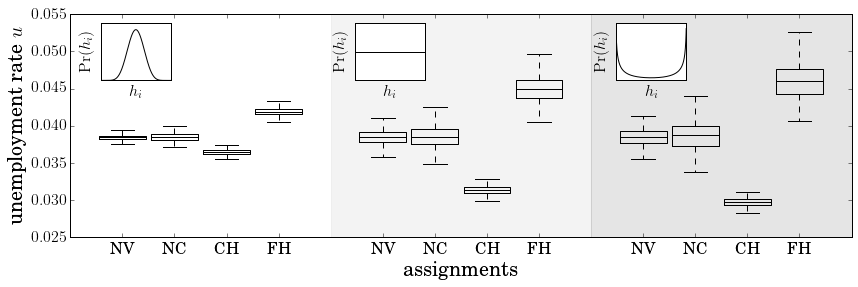

In [28]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, big_axes = plt.subplots(figsize=(14, 4) , nrows=1, ncols=1, sharey=True) 

plt.boxplot([box00, box01, box02, box03], boxprops={'color':'black'}, whiskerprops={'color':'black'}, 
            medianprops={'color':'black'}, usermedians=[np.mean(box00), np.mean(box01), np.mean(box02), 
            np.mean(box03)], showfliers=False, positions=[1, 2, 3, 4], widths=.9)

plt.boxplot([box10, box11, box12, box13], boxprops={'color':'black'}, whiskerprops={'color':'black'}, 
            medianprops={'color':'black'}, usermedians=[np.mean(box10), np.mean(box11), np.mean(box12), 
            np.mean(box13)], showfliers=False, positions=[6, 7, 8, 9], widths=.9)
plt.boxplot([box20, box21, box22, box23], boxprops={'color':'black'}, whiskerprops={'color':'black'}, 
            medianprops={'color':'black'}, usermedians=[np.mean(box20), np.mean(box21), np.mean(box22), 
            np.mean(box23)], showfliers=False, positions=[11, 12, 13, 14], widths=.9)

plt.ylabel(r'unemployment rate $u$', fontsize = 20)
plt.xlabel(r'assignments', fontsize = 20)
#plt.title(r'LFN Model Under Different Assignments of $h_i$ on Scale-Free Networks', fontsize = 20)
plt.axvspan(5, 10, color='grey', alpha=0.09)
plt.axvspan(10, 20, color='grey', alpha=0.2)
plt.xlim([0, 15])
plt.xticks([1,2,3,4,6,7,8,9,11,12,13,14], [r'NV', r'NC', r'CH', r'FH', r'NV', r'NC', r'CH', r'FH',
                                          r'NV', r'NC', r'CH', r'FH']);
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)

# insets
axins = fig.add_axes([0.155,0.67,0.07,0.2])
axins.plot(np.sort(np.linspace(.01, .99, 500)), st.beta.pdf(np.linspace(.01, .99, 500),10,10), '-k')
plt.xticks([])
plt.yticks([])
plt.xlim([.01, .99])
plt.xlabel(r'$h_i$', fontsize=16)
plt.ylabel(r'$\Pr(h_i)$', fontsize=16)

axins = fig.add_axes([0.407,0.67,0.07,0.2])
axins.plot(np.sort(np.linspace(.01, .99, 500)), st.beta.pdf(np.linspace(.01, .99, 500),1,1), '-k')
plt.xticks([])
plt.yticks([])
plt.xlim([.01, .99])
plt.xlabel(r'$h_i$', fontsize=16)
plt.ylabel(r'$\Pr(h_i)$', fontsize=16)

axins = fig.add_axes([0.666,0.67,0.07,0.2])
axins.plot(np.sort(np.linspace(.01, .99, 500)), st.beta.pdf(np.linspace(.01, .99, 500),.5,.5), '-k')
plt.xticks([])
plt.yticks([])
plt.xlim([.005, .99])
plt.xlabel(r'$h_i$', fontsize=16)
plt.ylabel(r'$\Pr(h_i)$', fontsize=16)

plt.savefig('/Users/tequilamambo/Dropbox/sharelatex/Policy and Internet (oii)/fig-experimentsPareto.pdf', bbox_inches='tight')